# Explore here

  Artist_Name         Track_Name Track_Duration  Popularity
0     Pantera               Walk         5 : 15          72
1     Pantera  Cowboys from Hell         4 : 03          71
2     Pantera     Cemetery Gates         7 : 02          65
3     Pantera             Floods         6 : 59          64
4     Pantera         I'm Broken         4 : 24          64
5     Pantera          This Love         6 : 33          64
6     Pantera         Domination         5 : 05          63
7     Pantera    5 Minutes Alone         5 : 47          61
8     Pantera               10's         4 : 49          60
9     Pantera      Mouth for War         3 : 57          60


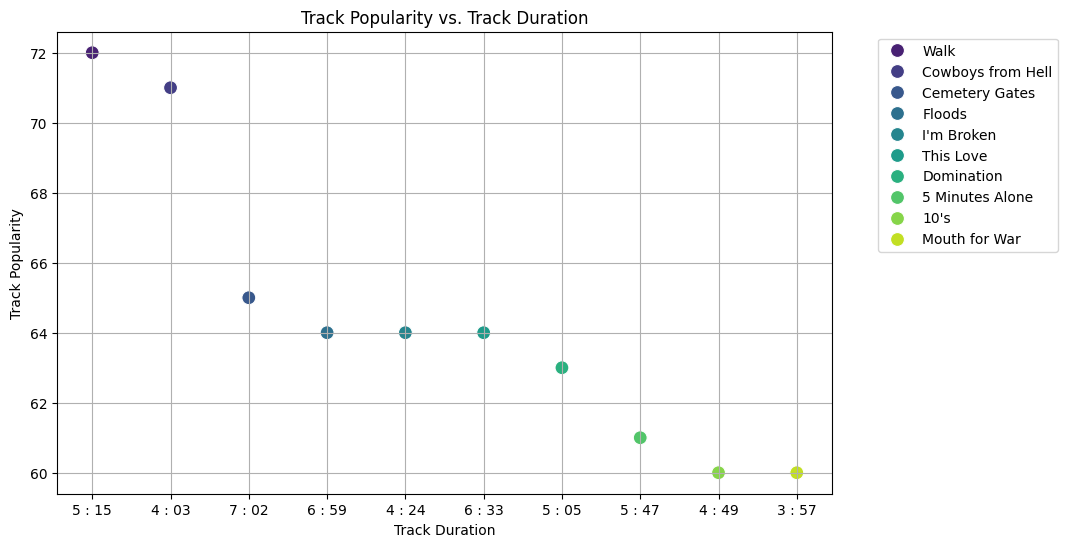

In [10]:
import os
import spotipy
import pandas as pd
import seaborn as sns
from dotenv import load_dotenv
import matplotlib.pyplot as plt
from spotipy.oauth2 import SpotifyClientCredentials

# load the .env file variables
load_dotenv()

client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(auth_manager=auth_manager)

# urn = 'spotify:artist:2ye2Wgw4gimLv2eAKyk1NB'
urn = 'spotify:artist:14pVkFUHDL207LzLHtSA18'

artistTopTracks = sp.artist_top_tracks(urn, country='US')

tracksData = []
for track in artistTopTracks['tracks']:
    track_info = {
        'Artist_Name' : track['artists'][0]['name'],
        'Track_Name' : track['name'],
        'Track_Duration' : track['duration_ms'],
        'Popularity' : track['popularity']
    }
    tracksData.append(track_info)

topTracks_df = pd.DataFrame(tracksData)

topTracks_df['Track_Duration'] = topTracks_df['Track_Duration'].apply(lambda x: f'{x // 60000} : {(x % 60000) // 1000:02d}')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Track_Duration', y='Popularity', data=topTracks_df, hue='Track_Name', palette='viridis', s=100)
plt.xlabel('Track Duration')
plt.ylabel('Track Popularity')
plt.title('Track Popularity vs. Track Duration')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

print(topTracks_df)
plt.show()